In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('output_2v2.csv')
df.head()
print(df.shape)
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

df['BS_frac_values'] = df['BS_frac'].apply(lambda x: np.array([float(val) for val in x.replace('[', '').replace(']', '').replace('\n', '').split()]))
frac = np.vstack(df.BS_frac_values.to_numpy())
df['BS_frac_avg'] = np.mean(frac,1)
df['BS_frac_avg_10'] = np.mean(frac[:,-10:],1)
df['BS_frac_avg_50'] = np.mean(frac[:,-50:],1)
df['BS_frac_avg_100'] = np.mean(frac[:,-100:],1)
df['BS_dist'] = np.abs(df['MeanBS'] - 135)
df.head()

(62, 12)


,Index,Info,MeanBS,StdBS,MaxBS,MeanSS,StdSS,MaxSS,MeanTS,StdTS,MaxTS,BS_frac,BS_frac_values,BS_frac_avg,BS_frac_avg_10,BS_frac_avg_50,BS_frac_avg_100,BS_dist
0,0,1,159.699650,159.699650,159.699650,1.664350,1.664350,1.664350,161.3640,161.3640,161.3640,[0.69139194 0.50634921 0.5 0.52427361 0...,"[0.69139194, 0.50634921, 0.5, 0.52427361, 0.59...",0.984439,1.000000,1.000000,1.000000,24.699650
1,1,0,98.123225,98.123225,98.123225,54.368775,54.368775,54.368775,152.4920,152.4920,152.4920,[0.90313327 0.5 0.5 0.5 0...,"[0.90313327, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5...",0.635724,0.694609,0.718592,0.682543,36.876775
2,2,2,47.849550,47.849550,47.849550,34.750450,34.750450,34.750450,82.6000,82.6000,82.6000,[0.94182809 0.56355932 0.70338983 0.63571429 0...,"[0.94182809, 0.56355932, 0.70338983, 0.6357142...",0.579292,0.523723,0.504745,0.502372,87.150450
3,3,2,127.466275,127.466275,127.466275,12.127225,12.127225,12.127225,139.5935,139.5935,139.5935,[0.85458959 0.5 0.56676755 0.5 0...,"[0.85458959, 0.5, 0.56676755, 0.5, 0.5, 0.5, 0...",0.854316,1.000000,1.000000,1.000000,7.533725
4,4,1,163.360525,163.360525,163.360525,0.439475,0.439475,0.439475,163.8000,163.8000,163.8000,[0.80668498 0.65671551 1. 1. 1...,"[0.80668498, 0.65671551, 1.0, 1.0, 1.0, 1.0, 1...",0.997317,1.000000,1.000000,1.000000,28.360525


In [4]:
df[['Info', 'MeanBS', 'MeanSS', 'MeanTS', 'BS_frac_avg', 'BS_frac_avg_10','BS_frac_avg_50', 'BS_frac_avg_100', 'BS_dist']].groupby('Info').mean()

,MeanBS,MeanSS,MeanTS,BS_frac_avg,BS_frac_avg_10,BS_frac_avg_50,BS_frac_avg_100,BS_dist
Info,,,,,,,,
0,110.153966,29.937352,140.091318,0.760462,0.774492,0.796242,0.764792,43.954616
1,103.244721,29.932805,133.177526,0.753351,0.816235,0.785769,0.763483,45.905671
2,94.313845,21.284855,115.598700,0.749956,0.760249,0.737695,0.746624,59.722765
3,112.340957,28.485954,140.826912,0.781262,0.756031,0.771981,0.776208,38.250754


In [5]:
df[['Info', 'MeanBS', 'MeanSS', 'MeanTS', 'BS_frac_avg', 'BS_frac_avg_10','BS_frac_avg_50', 'BS_frac_avg_100']].groupby('Info').mean().sort_values(by='BS_frac_avg')


,MeanBS,MeanSS,MeanTS,BS_frac_avg,BS_frac_avg_10,BS_frac_avg_50,BS_frac_avg_100
Info,,,,,,,
2,94.313845,21.284855,115.598700,0.749956,0.760249,0.737695,0.746624
1,103.244721,29.932805,133.177526,0.753351,0.816235,0.785769,0.763483
0,110.153966,29.937352,140.091318,0.760462,0.774492,0.796242,0.764792
3,112.340957,28.485954,140.826912,0.781262,0.756031,0.771981,0.776208


In [6]:
df[['Info', 'MeanBS', 'MeanSS', 'MeanTS', 'BS_frac_avg', 'BS_frac_avg_50']].groupby('Info').std().sort_values(by='MeanTS')

,MeanBS,MeanSS,MeanTS,BS_frac_avg,BS_frac_avg_50
Info,,,,,
3,38.671326,22.168244,30.055550,0.158583,0.198482
0,43.503383,26.337448,32.109050,0.186686,0.197131
1,42.514023,22.200243,35.690672,0.160564,0.190591
2,54.524040,16.753141,38.106698,0.199619,0.230689


In [7]:
df[['Info', 'MeanBS', 'MeanSS', 'MeanTS', 'BS_frac_avg', 'BS_frac_avg_50']].groupby('Info').max()

,MeanBS,MeanSS,MeanTS,BS_frac_avg,BS_frac_avg_50
Info,,,,,
0,163.381075,73.460325,163.8,0.997442,1.0
1,163.360525,75.625225,163.8,0.997317,1.0
2,163.800000,41.075075,163.8,1.000000,1.0
3,163.800000,59.662975,163.8,1.000000,1.0


In [8]:
df[['Info', 'MeanBS', 'MeanSS', 'MeanTS', 'BS_frac_avg', 'BS_frac_avg_50']].groupby('Info').min()

,MeanBS,MeanSS,MeanTS,BS_frac_avg,BS_frac_avg_50
Info,,,,,
0,49.253675,0.418925,82.6,0.546815,0.500000
1,47.550975,0.439475,82.6,0.538092,0.500000
2,41.678425,0.000000,82.6,0.502986,0.500000
3,50.510075,0.000000,82.6,0.598676,0.505755


In [9]:
df[['Info', 'MeanBS', 'MeanSS', 'MeanTS', 'BS_frac_avg', 'BS_frac_avg_50']].groupby('Info').median()

,MeanBS,MeanSS,MeanTS,BS_frac_avg,BS_frac_avg_50
Info,,,,,
0,98.271050,32.394625,155.6580,0.657081,0.814040
1,99.737850,30.248550,151.7865,0.673880,0.778593
2,59.143650,28.695225,91.4285,0.685374,0.679789
3,106.027825,32.104675,155.2430,0.736813,0.778045


In [10]:
np.std(frac[:,-10:] - np.mean(frac[:,-10:],0)), np.std(frac[:,:] - np.mean(frac[:,:],0))

(0.20804764209000645, 0.2090217784627977)

### Buyer Surplus

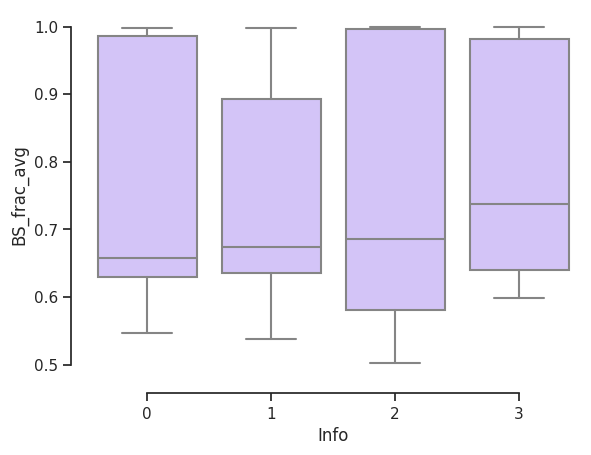

In [11]:
import seaborn as sns
sns.boxplot(x="Info", y="BS_frac_avg", palette=["m"],data=df)
sns.despine(offset=10, trim=True)
plt.savefig("1.png")

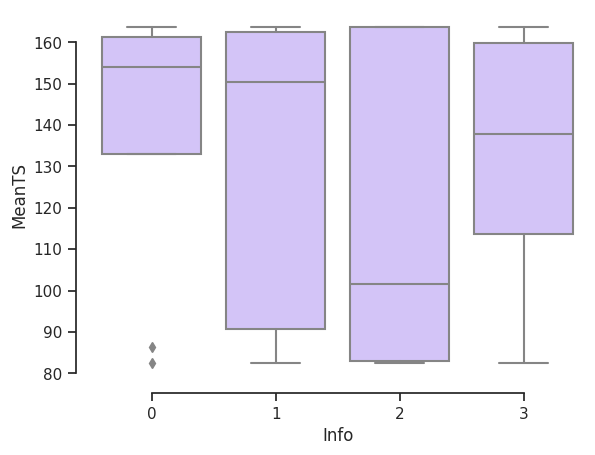

In [73]:
import seaborn as sns
sns.boxplot(x="Info", y="MeanTS", palette=["m"],data=df)
sns.despine(offset=10, trim=True)
plt.savefig("1.png")

In [74]:
a= np.array([
        [48.7, 62.4, 64.4, 69.7, 73.9, 88.0, 89.9, 100.2],
        [47.4, 65.1, 68.8, 71.5, 79.0, 84.7, 85.8, 102.9]])
b = np.array([
        [93.4, 75.3, 72.4, 64.0, 60.9, 59.6, 48.7, 24.6],
        [95.1, 94.9, 81.9, 77.3, 75.3, 63.5, 42.3, 20.2]])

In [43]:
demand_schedule, supply_schedule, P_grid, min_price, max_price = compute_demand_supply(a,b,2,2)

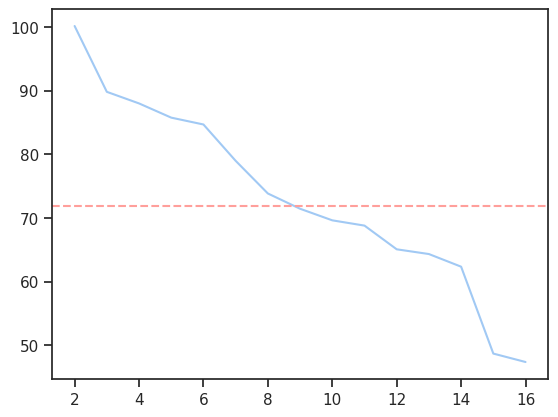

In [96]:
k = []
for i, q in enumerate(demand_schedule):
    try:
        if demand_schedule[i] - demand_schedule[i+1] == 1:
            k.append(i)
    except: 
        pass

prices = P_grid[k]

prices = P_grid[k]
quantities = np.array(range(16,1,-1))

plt.plot(quantities, prices)
plt.axhline(p, color='r', linestyle='--', label="Equilibrium Price")


In [100]:
supply_schedule

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

In [111]:
np.unique(supply_schedule)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16])

[53, 266, 344, 475, 491, 523, 529, 630, 689, 745, 884, 902, 904]


ValueError: x and y must have same first dimension, but have shapes (15,) and (13,)

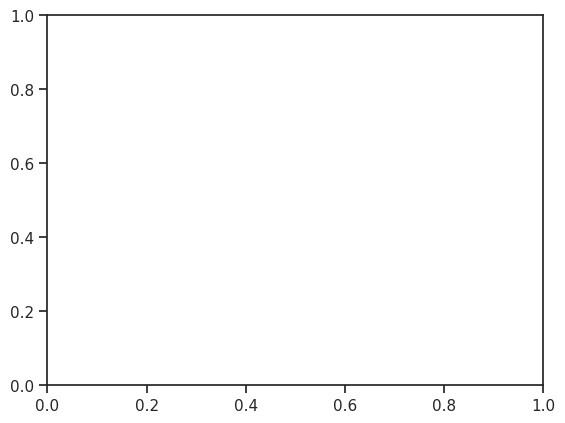

In [113]:
k = []
d = np.unique(supply_schedule)
for i, q in enumerate(supply_schedule):
    try:
        if (supply_schedule[i] - supply_schedule[i+1] == -1) and (supply_schedule[i+1] in d):
            k.append(i)
    except: 
        pass
print(k)
prices = P_grid[k]
quantities = list(np.unique(supply_schedule))
plt.plot(quantities, prices)
plt.axhline(p, color='r', linestyle='--', label="Equilibrium Price")


In [83]:
prices = P_grid[k]
quantities = np.array(range(16,1,-1))

In [95]:
9*30/2

135.0

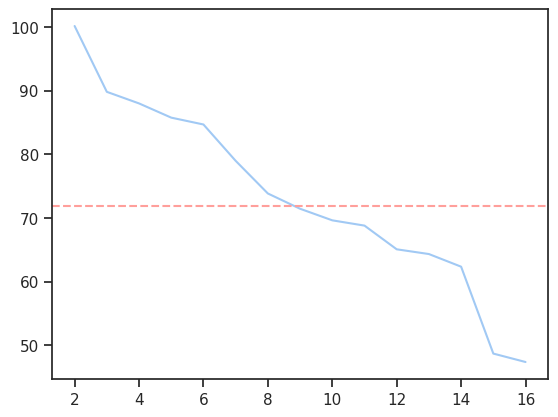

In [94]:
plt.plot(quantities, prices)
plt.axhline(p, color='r', linestyle='--', label="Equilibrium Price")


[47.35275275 48.67727728 62.33643644 64.32322322 65.06826827 68.79349349
 69.62132132] [47.35275275 48.67727728 62.33643644 64.32322322 65.06826827 68.79349349
 69.62132132]
Area under Demand Curve: 306.2549049049049


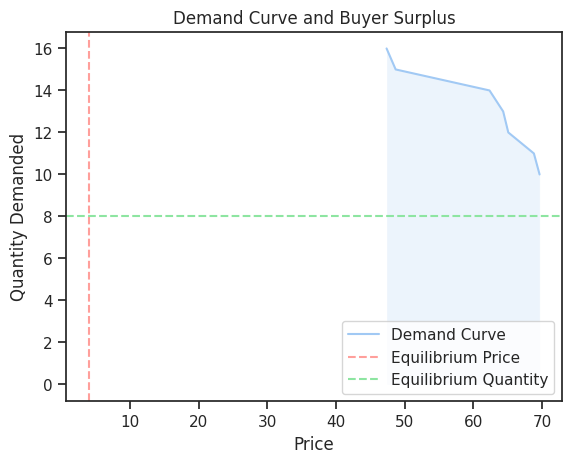

In [90]:
index_eq = np.where(prices <= p)[0][-1]

# Create the demand curve up to the equilibrium price
demand_curve_x = quantities[:index_eq]
demand_curve_y = prices[:index_eq]

print(demand_curve_y, demand_curve_y)
# Calculate the area under the demand curve
area_under_demand_curve = np.trapz(demand_curve_x, demand_curve_y)

# Plot the demand curve and equilibrium point
plt.plot(demand_curve_y, demand_curve_x, label="Demand Curve")
plt.axvline(x=p_eq, color='r', linestyle='--', label="Equilibrium Price")
plt.axhline(y=q_eq, color='g', linestyle='--', label="Equilibrium Quantity")
plt.fill_between(demand_curve_y, demand_curve_x, alpha=0.2)
plt.xlabel("Price")
plt.ylabel("Quantity Demanded")
plt.legend()
plt.title("Demand Curve and Buyer Surplus")

print("Area under Demand Curve:", area_under_demand_curve)
plt.show()

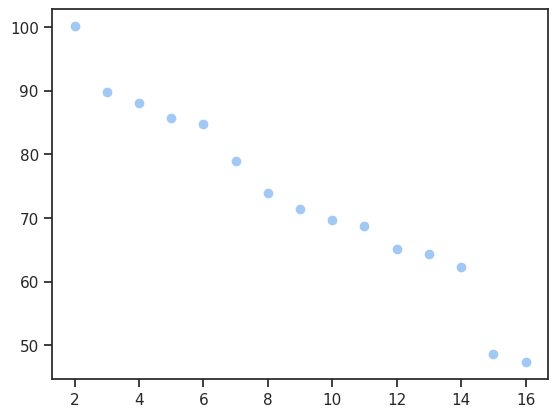

In [85]:
plt.scatter(quantities, prices)

In [87]:
p, q = equilibrium(demand_schedule, supply_schedule, P_grid);
p

20.2 16 1
20.282782782782782 16 1
20.365565565565564 16 1
20.448348348348347 16 1
20.53113113113113 16 1
20.613913913913912 16 1
20.696696696696694 16 1
20.77947947947948 16 1
20.862262262262263 16 1
20.945045045045045 16 1
21.027827827827828 16 1
21.11061061061061 16 1
21.193393393393393 16 1
21.276176176176175 16 1
21.358958958958958 16 1
21.44174174174174 16 1
21.524524524524523 16 1
21.607307307307305 16 1
21.690090090090088 16 1
21.772872872872874 16 1
21.855655655655656 16 1
21.93843843843844 16 1
22.02122122122122 16 1
22.104004004004004 16 1
22.186786786786787 16 1
22.26956956956957 16 1
22.35235235235235 16 1
22.435135135135134 16 1
22.517917917917917 16 1
22.6007007007007 16 1
22.68348348348348 16 1
22.766266266266264 16 1
22.84904904904905 16 1
22.931831831831833 16 1
23.014614614614615 16 1
23.097397397397398 16 1
23.18018018018018 16 1
23.262962962962963 16 1
23.345745745745745 16 1
23.428528528528528 16 1
23.51131131131131 16 1
23.594094094094093 16 1
23.676876876876875 1

71.93923923923923

In [52]:

# Step 1: Create a mask for active demand
active_demand_mask = np.where(P_grid >= p,1,0)  # Demand is active up to the equilibrium price

# Step 2: Calculate buyer surplus
buyer_surplus = np.sum((demand_schedule[active_demand_mask] - q))/p
buyer_surplus

111.20495691364502

In [41]:
import numpy as np

# Example demand schedule (quantities demanded at each price)
P_grid = np.linspace(0, 10, 1000)  # Price grid (adjust the size to match your demand schedule)
demand_schedule = 10 - 0.5 * P_grid  # Example demand schedule (for this example)

# Equilibrium price and quantity
p_eq = 4.0  # Example equilibrium price
q_eq = 10 - 0.5 * p_eq  # Example equilibrium quantity

# Step 1: Create a mask for active demand
active_demand_mask = np.where(P_grid <= p_eq,1,0)  # Demand is active up to the equilibrium price

# Step 2: Calculate buyer surplus
buyer_surplus = np.sum((demand_schedule[active_demand_mask] - p_eq) * np.diff(P_grid)[active_demand_mask])

print("Buyer Surplus:", buyer_surplus)


Buyer Surplus: 60.04001999997995


In [29]:

# Step 1: Create a mask for active demand
active_demand_mask = np.where(P_grid <= p_eq,1,0)  # Demand is active up to the equilibrium price

# Step 2: Calculate buyer surplus
buyer_surplus = np.sum((demand_schedule[active_demand_mask] - p_eq) * np.diff(P_grid)[active_demand_mask])


(1000,)

In [34]:
np.diff(P_grid).shape

(999,)

In [38]:
above = P_grid - p
np.where(above>=0,above,0)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [39]:
active_demand_mask = P_grid <= p  # Demand is active up to the equilibrium price
P_grid - p
# Step 2: Calculate buyer surplus
print(demand_schedule[active_demand_mask].shape)
print(np.diff(P_grid)[active_demand_mask-1].shape)
buyer_surplus = np.sum((demand_schedule[active_demand_mask] - q) * np.diff(P_grid)[active_demand_mask-1])

print("Buyer Surplus:", buyer_surplus)

(625,)
(1000,)


ValueError: operands could not be broadcast together with shapes (625,) (1000,) 

In [22]:
# Step 1: Calculate the difference between P_grid and the equilibrium price
price_difference = P_grid - p

# Step 2: Create a mask for active demand
active_demand_mask = price_difference <= 0
active_demand_mask = np.append(active_demand_mask, False)  # Add one more False value to match the shape

# Step 3: Calculate buyer surplus
buyer_surplus = np.sum(demand_schedule[active_demand_mask] * np.diff(P_grid[active_demand_mask]))

print("Buyer Surplus:", buyer_surplus)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1000 but corresponding boolean dimension is 1001

In [12]:
def compute_demand_supply(redemption_values,token_costs,nbuyers,ntokens,granularity=1000):
    max_price = np.max(redemption_values)
    min_price = np.min(token_costs)
    P_grid = np.linspace(min_price,max_price,granularity)
    demand_schedule = np.zeros((granularity),dtype = 'int')
    supply_schedule = np.zeros((granularity), dtype = 'int')
    for i, p in enumerate(P_grid):
        demand_schedule[i] = np.sum(p<=redemption_values)  
        supply_schedule[i] = np.sum(p>=token_costs) 
    return demand_schedule, supply_schedule, P_grid, min_price, max_price

def equilibrium(demand_schedule,supply_schedule,P_grid):
    p_eqbm, q_eqbm = [], np.nan
    for i, p in enumerate(P_grid):
        print(p, demand_schedule[i], supply_schedule[i])
        if demand_schedule[i] == supply_schedule[i]: # when sellers are ready to sell
            p_eqbm.append(p)
            q_eqbm = demand_schedule[i] 
    return np.nanmean(p_eqbm), q_eqbm

def surplus(demand_schedule,supply_schedule,P_grid, p_eqbm, q_eqbm):
    p_eqbm, q_eqbm = [], np.nan
    buyer_surplus = demand_schedule - p_eqbm
    seller_suplus = 0
    demand_schedule - p_eqbm
    for i, q in enumerate(range(q_eqbm)):
        print(p, demand_schedule[i], supply_schedule[i])
        if demand_schedule[i] == supply_schedule[i]: # when sellers are ready to sell
            p_eqbm.append(p)
            q_eqbm = demand_schedule[i] 
    return np.nanmean(p_eqbm), q_eqbm

In [ ]:
import numpy as np
import gym
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

class OUActionNoise:
    def __init__(self, mean, std_deviation, theta=0.15, dt=1e-2, x_initial=None):
        self.theta, self.mean, self.std_dev = theta, mean, std_deviation
        self.dt, self.x_initial = dt, x_initial
        self.reset()
    def __call__(self):
        x = (self.x_prev + self.theta * (self.mean - self.x_prev) * self.dt +
             self.std_dev * np.sqrt(self.dt) * np.random.normal(size=self.mean.shape))
        self.x_prev = x
        return x
    def reset(self):
        self.x_prev = self.x_initial if self.x_initial is not None else np.zeros_like(self.mean)

class Buffer:
    def __init__(self, buffer_capacity=100000, batch_size=64):
        self.buffer_capacity, self.batch_size = buffer_capacity, batch_size
        self.buffer_counter = 0
        self.state_buffer = np.zeros((buffer_capacity, num_states))
        self.action_buffer = np.zeros((buffer_capacity, num_actions))
        self.reward_buffer = np.zeros((buffer_capacity, 1))
        self.next_state_buffer = np.zeros((buffer_capacity, num_states))
    def record(self, obs_tuple):
        index = self.buffer_counter % self.buffer_capacity
        (self.state_buffer[index], self.action_buffer[index],
         self.reward_buffer[index], self.next_state_buffer[index]) = obs_tuple
        self.buffer_counter += 1
    #@tf.function
    def update(self, actor_model, critic_model, target_actor, target_critic, actor_optimizer, critic_optimizer,state_batch, action_batch, reward_batch, next_state_batch):
        with tf.GradientTape() as tape:
            target_actions = target_actor(next_state_batch, training=True)
            y = reward_batch + gamma * target_critic([next_state_batch, target_actions], training=True)
            critic_value = critic_model([state_batch, action_batch], training=True)
            critic_loss = tf.reduce_mean(tf.square(y - critic_value))
        critic_grad = tape.gradient(critic_loss, critic_model.trainable_variables)
        critic_optimizer.apply_gradients(zip(critic_grad, critic_model.trainable_variables))
        with tf.GradientTape() as tape:
            actions = actor_model(state_batch, training=True)
            critic_value = critic_model([state_batch, actions], training=True)
            actor_loss = -tf.reduce_mean(critic_value)
        actor_grad = tape.gradient(actor_loss, actor_model.trainable_variables)
        actor_optimizer.apply_gradients(zip(actor_grad, actor_model.trainable_variables))
    def learn(self, actor_model, critic_model, target_actor, target_critic,actor_optimizer,critic_optimizer):
        record_range = min(self.buffer_counter, self.buffer_capacity)
        batch_indices = np.random.choice(record_range, self.batch_size)
        state_batch = tf.convert_to_tensor(self.state_buffer[batch_indices])
        action_batch = tf.convert_to_tensor(self.action_buffer[batch_indices])
        reward_batch = tf.cast(tf.convert_to_tensor(self.reward_buffer[batch_indices]), dtype=tf.float32)
        next_state_batch = tf.convert_to_tensor(self.next_state_buffer[batch_indices])
        self.update(actor_model, critic_model, target_actor, target_critic,actor_optimizer,critic_optimizer,state_batch, action_batch, reward_batch, next_state_batch)

@tf.function
def update_target(target_weights, weights, tau):
    for a, b in zip(target_weights, weights):
        a.assign(b * tau + a * (1 - tau))

def get_actor():
    last_init = tf.random_uniform_initializer(minval=-0.003, maxval=0.003)
    inputs = layers.Input(shape=(num_states,))
    out = layers.Dense(256, activation="relu")(inputs)
    out = layers.Dense(256, activation="relu")(out)
    outputs = layers.Dense(1, activation="tanh", kernel_initializer=last_init)(out)
    outputs = outputs * upper_bound
    model = tf.keras.Model(inputs, outputs)
    return model

def get_critic():
    state_input = layers.Input(shape=(num_states))
    state_out = layers.Dense(16, activation="relu")(state_input)
    state_out = layers.Dense(32, activation="relu")(state_out)
    action_input = layers.Input(shape=(num_actions))
    action_out = layers.Dense(32, activation="relu")(action_input)
    concat = layers.Concatenate()([state_out, action_out])
    out = layers.Dense(256, activation="relu")(concat)
    out = layers.Dense(256, activation="relu")(out)
    outputs = layers.Dense(1)(out)
    model = tf.keras.Model([state_input, action_input], outputs)
    return model

def policy(state, noise_object, actor_model, lower_bound, upper_bound):
    sampled_actions = tf.squeeze(actor_model(state))
    noise = noise_object()
    sampled_actions = sampled_actions.numpy() + noise
    legal_action = np.clip(sampled_actions, lower_bound, upper_bound)
    return [np.squeeze(legal_action)]

class MultiAgentTradingEnv(gym.Env):
    def __init__(self, db, nsteps):
        self.rnd = 0
        self.lower_bound = 0.0
        self.upper_bound = 1.0
        self.period = -1
        self.nperiods = nperiods
        self.db = db
        self.action_space = gym.spaces.Box(0, 1, (1,), dtype=np.float32)  # Continuous action space [0, 1]
        self.observation_space = gym.spaces.Box(-1, 200, (1,), dtype=np.float32)  # Continuous state space

    def reset(self):
        self.db.reset_period(self.rnd)
        self.timestep = 0
        self.period += 1
        [buyer.next_token() for buyer in self.db.buyers]
        [seller.next_token() for seller in self.db.sellers]
        observations = []
        for agent_idx in range(4):
            if agent_idx<2:
                agent = self.db.buyers[agent_idx]
            else:
                agent_idx = agent_idx - 2
                agent = self.db.buyers[agent_idx]
            if information == 0:
                # environmental
                observation = np.array([self.timestep + 1, agent.value, agent.step_profit,
                                        agent.sale, agent.num_tokens_traded], dtype=np.float32)
            elif information == 1:
                # environmental + winning
                data = [self.timestep + 1, -1, -1, agent.value,
                        agent.step_profit, agent.sale, agent.num_tokens_traded]
                observation = np.array(data, dtype=np.float32)                
            elif information == 2:
                # environmental + winning + log
                data = [self.timestep + 1, -1,  -1,  -1,
                         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1, 
                         -1,  -1,  -1, agent.value,
                        agent.step_profit, agent.sale, agent.num_tokens_traded]
                observation = np.array(data, dtype=np.float32)
            elif information == 3: 
                buyer_tokens = [0 for i in self.db.buyers]
                seller_tokens = [0 for i in self.db.sellers]
                buyer_sale = [-1 for i in self.db.buyers]
                seller_sale = [-1 for i in self.db.sellers]
                data = [self.timestep + 1,  -1,  -1,  -1,
                         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1, 
                         -1,  -1,  -1, agent.value,
                        agent.step_profit, agent.sale, agent.num_tokens_traded]
                data = data + [-1]*self.db.nbuyers + [-1]*self.db.nsellers + buyer_tokens + buyer_sale + seller_tokens + seller_sale
                observation = np.array(data, dtype=np.float32)         
            idx = np.isnan(observation)
            observation[idx] = -1.0
            observations.append(observation)
        return observations  # Return continuous state

    def step(self, action0, action1, seller_action0, seller_action1):
        global information
        [buyer.next_token() for buyer in self.db.buyers]
        [seller.next_token() for seller in self.db.sellers]
        
        # bidder0
        bid_frac = np.clip(action0, self.lower_bound, self.upper_bound)
        self.db.buyers[0].next_token()
        min_bid = self.db.buyers[0].value * min_frac
        max_bid = self.db.buyers[0].value * max_frac
        bid0 = np.round(max_bid * bid_frac + (1 - bid_frac) * min_bid, 2)

        # bidder1
        bid_frac = np.clip(action1, self.lower_bound, self.upper_bound)
        self.db.buyers[1].next_token()
        min_bid = self.db.buyers[1].value * min_frac
        max_bid = self.db.buyers[1].value * max_frac
        bid1 = np.round(max_bid * bid_frac + (1 - bid_frac) * min_bid, 2)

        # seller0
        ask_frac = np.clip(seller_action0, self.lower_bound, self.upper_bound)
        self.db.sellers[0].next_token()
        min_ask = self.db.sellers[0].value * min_frac
        min_ask = self.db.sellers[0].value * max_frac
        ask0 = np.round(min_ask * ask_frac + (1 - ask_frac) * min_ask, 2)

        # seller0
        ask_frac = np.clip(seller_action1, self.lower_bound, self.upper_bound)
        self.db.sellers[1].next_token()
        min_ask = self.db.sellers[1].value * min_frac
        min_ask = self.db.sellers[1].value * max_frac
        ask1 = np.round(min_ask * ask_frac + (1 - ask_frac) * min_ask, 2)

        # Simulate market
        bids = [buyer.bid(self.db) for buyer in self.db.buyers]
        bids[0] = bid0.item()
        bids[1] = bid1.item()
        asks = [seller.ask(self.db) for seller in self.db.sellers]
        asks[0] = ask0.item()
        asks[1] = ask1.item()
        current_ask, current_ask_idx, current_bid, current_bid_idx = current_bid_ask(bids, asks)
        sale, price, bprofit, sprofit, buy, sell = buy_sell(self.db, current_bid, current_bid_idx, current_ask,
                                                           current_ask_idx)
        step_data = [self.rnd, self.period, self.timestep, bids, asks, current_bid, current_bid_idx, current_ask,
                     current_ask_idx, buy, sell, price, sale, bprofit, sprofit]
        self.db.add_step(step_data)

        # REWARDS
        reward0 = 0.0
        reward1 = 0.0
        seller_reward0 = 0.0
        seller_reward1 = 0.0
        if sale == 1:
            if current_bid_idx == 0:
                reward0 = bprofit
            if current_bid_idx == 1:
                reward1 = bprofit 
            if current_ask_idx == 0:
                seller_reward0 = sprofit
            if current_ask_idx == 1:
                seller_reward1 = sprofit    
        rewards = [reward0,reward1,seller_reward0,seller_reward1]
                
        # STATES
        observations = []
        for agent_idx in range(4):
            if agent_idx<2:
                agent = self.db.buyers[agent_idx]
            else:
                agent_idx = agent_idx - 2
                agent = self.db.buyers[agent_idx]
            if information == 0:
                # environmental
                observation = np.array([self.timestep + 1, agent.value, agent.step_profit,
                                        agent.sale, agent.num_tokens_traded], dtype=np.float32)
            elif information == 1:
                # environmental + winning
                data = [self.timestep + 1, sale, price, agent.value,
                        agent.step_profit, agent.sale, agent.num_tokens_traded]
                observation = np.array(data, dtype=np.float32)                
            elif information == 2:
                # environmental + winning + log
                data = [self.timestep + 1, current_ask, current_ask_idx, current_bid,
                        current_bid_idx, sale, price, buy, sell, np.min(bids), np.max(bids), np.mean(bids), 
                        np.min(asks), np.max(asks), np.mean(asks), agent.value,
                        agent.step_profit, agent.sale, agent.num_tokens_traded]
                observation = np.array(data, dtype=np.float32)
            elif information == 3: 
                buyer_tokens = [i.num_tokens_traded for i in self.db.buyers]
                seller_tokens = [i.num_tokens_traded for i in self.db.sellers]
                buyer_sale = [i.sale for i in self.db.buyers]
                seller_sale = [i.sale for i in self.db.sellers]
                data = [self.timestep + 1, current_ask, current_ask_idx, current_bid,
                        current_bid_idx, sale, price, buy, sell, np.min(bids), np.max(bids), np.mean(bids), 
                        np.min(asks), np.max(asks), np.mean(asks), agent.value,
                        agent.step_profit, agent.sale, agent.num_tokens_traded]
                data2 = data + bids + asks + buyer_tokens + buyer_sale + seller_tokens + seller_sale
                observation = np.array(data2, dtype=np.float32)         
            idx = np.isnan(observation)
            observation[idx] = -1.0
            observations.append(observation)
            
        # Check termination
        self.timestep += 1
        terminated = self.timestep == nsteps
        truncated = terminated  # Truncated episodes are not used in DDPG

        return observations, rewards, terminated, {}
                         
import numpy as np
from functions import *
from itertools import count
buyer_strategies = ['Honest','Honest']
seller_strategies = ['Honest','Honest']
nbuyers, nsellers = len(buyer_strategies), len(seller_strategies)
nrounds, nperiods, ntokens, nsteps, gametype, nbuyers, nsellers = 10, 10, 4, 16, '1234', len(buyer_strategies), len(seller_strategies)
R1, R2, R3, R4 = gametype_to_ran(gametype)
game_metadata = [nrounds, nperiods, ntokens, nbuyers, nsellers, nsteps, R1, R2, R3, R4]
num_iterations = 5

for iteration in range(num_iterations):
    information = np.random.choice([0,1,2,3])
    db = Database(game_metadata, buyer_strategies, seller_strategies)
    rnd = 0
    period = 0
    min_frac = 0.01
    max_frac = 1.0
    db.reset_round(rnd, ntokens, nbuyers, nsellers, R1, R2, R3, R4)
    db.round_data.token_costs = [np.array([
        [48.7, 62.4, 64.4, 69.7, 73.9, 88.0, 89.9, 100.2],
        [47.4, 65.1, 68.8, 71.5, 79.0, 84.7, 85.8, 102.9]])]
    db.round_data.redemption_values = [np.array([
        [93.4, 75.3, 72.4, 64.0, 60.9, 59.6, 48.7, 24.6],
        [95.1, 94.9, 81.9, 77.3, 75.3, 63.5, 42.3, 20.2]])]
    env = MultiAgentTradingEnv(db,nsteps)
    _, num_actions = env.observation_space.shape[0], env.action_space.shape[0]
    upper_bound, lower_bound = env.action_space.high[0], env.action_space.low[0]
    
    if information == 0:
        num_states = 5
    elif information == 1:
        num_states = 7
    elif information == 2:
        num_states = 19
    elif information == 3:
        num_states = 31    

    # Common parameters
    std_dev = 0.2
    gamma = 0.99
    tau = 0.005
    critic_lr = 0.002
    actor_lr = 0.001

    # Noise
    ou_noise0 = OUActionNoise(mean=np.zeros(1), std_deviation=float(std_dev) * np.ones(1))
    ou_noise1 = OUActionNoise(mean=np.zeros(1), std_deviation=float(std_dev) * np.ones(1))
    seller_ou_noise0 = OUActionNoise(mean=np.zeros(1), std_deviation=float(std_dev) * np.ones(1))
    seller_ou_noise1 = OUActionNoise(mean=np.zeros(1), std_deviation=float(std_dev) * np.ones(1))

    # Agent 1
    actor_model0 = get_actor()
    critic_model0 = get_critic()
    target_actor0 = get_actor()
    target_critic0 = get_critic()
    target_actor0.set_weights(actor_model0.get_weights())
    target_critic0.set_weights(critic_model0.get_weights())
    critic_optimizer0 = tf.keras.optimizers.Adam(critic_lr)
    actor_optimizer0 = tf.keras.optimizers.Adam(actor_lr)
    buffer0 = Buffer(50000, 64)
    ep_reward_list0, avg_reward_list0 = [], []

    # Agent 2
    actor_model1 = get_actor()
    critic_model1 = get_critic()
    target_actor1 = get_actor()
    target_critic1 = get_critic()
    target_actor1.set_weights(actor_model1.get_weights())
    target_critic1.set_weights(critic_model1.get_weights())
    critic_optimizer1 = tf.keras.optimizers.Adam(critic_lr)
    actor_optimizer1 = tf.keras.optimizers.Adam(actor_lr)
    buffer1 = Buffer(50000, 64)
    ep_reward_list1, avg_reward_list1 = [], []

    # Agent 3 (Seller 1)
    seller_actor_model0 = get_actor()
    seller_critic_model0 = get_critic()
    seller_target_actor0 = get_actor()
    seller_target_critic0 = get_critic()
    seller_target_actor0.set_weights(seller_actor_model0.get_weights())
    seller_target_critic0.set_weights(seller_critic_model0.get_weights())
    seller_critic_optimizer0 = tf.keras.optimizers.Adam(critic_lr)
    seller_actor_optimizer0 = tf.keras.optimizers.Adam(actor_lr)
    seller_buffer0 = Buffer(50000, 64)
    seller_ep_reward_list0, seller_avg_reward_list0 = [], []

    # Agent 4 (Seller 2)
    seller_actor_model1 = get_actor()
    seller_critic_model1 = get_critic()
    seller_target_actor1 = get_actor()
    seller_target_critic1 = get_critic()
    seller_target_actor1.set_weights(seller_actor_model1.get_weights())
    seller_target_critic1.set_weights(seller_critic_model1.get_weights())
    seller_critic_optimizer1 = tf.keras.optimizers.Adam(critic_lr)
    seller_actor_optimizer1 = tf.keras.optimizers.Adam(actor_lr)
    seller_buffer1 = Buffer(50000, 64)
    seller_ep_reward_list1, seller_avg_reward_list1 = [], []

    total_episodes = 200
    for ep in range(total_episodes):
        prev_state0, prev_state1, seller_prev_state0, seller_prev_state1 = env.reset()
        episodic_reward0, episodic_reward1, seller_episodic_reward0, seller_episodic_reward1 = 0, 0,0,0

        while True:
            tf_prev_state0 = tf.expand_dims(tf.convert_to_tensor(prev_state0), 0)
            tf_prev_state1 = tf.expand_dims(tf.convert_to_tensor(prev_state1), 0)
            tf_seller_prev_state0 = tf.expand_dims(tf.convert_to_tensor(seller_prev_state0), 0)
            tf_seller_prev_state1 = tf.expand_dims(tf.convert_to_tensor(seller_prev_state1), 0)

            # actions
            action0 = policy(tf_prev_state0, ou_noise0, actor_model0, lower_bound, upper_bound)
            action1 = policy(tf_prev_state1, ou_noise1, actor_model1, lower_bound, upper_bound)
            seller_action0 = policy(tf_seller_prev_state0, seller_ou_noise0, seller_actor_model0, lower_bound, upper_bound)
            seller_action1 = policy(tf_seller_prev_state1, seller_ou_noise1, seller_actor_model1, lower_bound, upper_bound)

            # Play game
            observations, rewards, done, info = env.step(action0, action1, seller_action0, seller_action1)
            [state0, state1, seller_state0, seller_state1] = observations
            [reward0, reward1, seller_reward0, seller_reward1] = rewards
            
            # Record
            buffer0.record((prev_state0, action0, reward0, state0))
            buffer1.record((prev_state1, action1, reward1, state1))
            seller_buffer0.record((prev_state0, seller_action0, seller_reward0, seller_state0))
            seller_buffer1.record((prev_state1, seller_action1, seller_reward1, seller_state1))

            # Episodic rewards
            episodic_reward0 += reward0
            episodic_reward1 += reward1
            seller_episodic_reward0 += seller_reward0
            seller_episodic_reward1 += seller_reward1

            # Training
            buffer0.learn(actor_model0, critic_model0, target_actor0, target_critic0, actor_optimizer0, critic_optimizer0)
            buffer1.learn(actor_model1, critic_model1, target_actor1, target_critic1, actor_optimizer1, critic_optimizer1)
            seller_buffer0.learn(seller_actor_model0,seller_critic_model0,seller_target_actor0,seller_target_critic0,seller_actor_optimizer0,seller_critic_optimizer0,)
            seller_buffer1.learn(seller_actor_model1,seller_critic_model1,seller_target_actor1,seller_target_critic1,seller_actor_optimizer1,seller_critic_optimizer1,)

            # update target
            update_target(target_actor0.variables, actor_model0.variables, tau)
            update_target(target_critic0.variables, critic_model0.variables, tau)
            update_target(target_actor1.variables, actor_model1.variables, tau)
            update_target(target_critic1.variables, critic_model1.variables, tau)
            update_target(seller_target_actor0.variables, seller_actor_model0.variables, tau)
            update_target(seller_target_critic0.variables, seller_critic_model0.variables, tau)
            update_target(seller_target_actor1.variables, seller_actor_model1.variables, tau)
            update_target(seller_target_critic1.variables, seller_critic_model1.variables, tau)

            if done:
                break
            prev_state0 = state0
            prev_state1 = state1
            seller_prev_state0 = seller_state0
            seller_prev_state1 = seller_state1

        # avg reward
        ep_reward_list0.append(episodic_reward0)
        ep_reward_list1.append(episodic_reward1)
        seller_ep_reward_list0.append(seller_episodic_reward0)
        seller_ep_reward_list1.append(seller_episodic_reward1)
        avg_reward0 = np.mean(ep_reward_list0[-40:])
        avg_reward1 = np.mean(ep_reward_list1[-40:])
        seller_avg_reward0 = np.mean(seller_ep_reward_list0[-40:])
        seller_avg_reward1 = np.mean(seller_ep_reward_list1[-40:])
        print("Episode * {} * Avg Rewards ==> {}, {}, Sellers' Avg Rewards ==> {}, {}".format(
                ep, np.round(avg_reward0,0), np.round(avg_reward1,0), np.round(seller_avg_reward0,0), np.round(seller_avg_reward1,0)))
        avg_reward_list0.append(avg_reward0)
        avg_reward_list1.append(avg_reward1)   
        seller_avg_reward_list0.append(seller_avg_reward0)
        seller_avg_reward_list1.append(seller_avg_reward1)

    # generate outcomes
    ep_reward_list0 = np.array(ep_reward_list0)
    ep_reward_list1 = np.array(ep_reward_list1)
    seller_ep_reward_list0 = np.array(seller_ep_reward_list0)
    seller_ep_reward_list1 = np.array(seller_ep_reward_list1)
    BS = ep_reward_list0 + ep_reward_list1
    SS = seller_ep_reward_list0 + seller_ep_reward_list1
    TS = BS + SS
    BS_frac = BS/TS
    meanBS = np.mean(BS)
    stdBS = np.mean(BS)
    maxBS = np.mean(BS)
    meanSS = np.mean(SS)
    stdSS = np.mean(SS)
    maxSS = np.mean(SS)
    meanTS = np.mean(TS)
    stdTS = np.mean(TS)
    maxTS = np.mean(TS)
    print(iteration, information, meanBS, meanSS, meanTS)

2023-09-28 20:40:59.738016: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-09-28 20:40:59.738405: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-09-28 20:40:59.738437: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-28 20:40:59.749748: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-28 20:41:00.704361: W tensorflow/c

Episode * 0 * Avg Rewards ==> 42.0, 82.0, Sellers' Avg Rewards ==> 30.0, 9.0
Episode * 1 * Avg Rewards ==> 31.0, 72.0, Sellers' Avg Rewards ==> 40.0, 21.0
Episode * 2 * Avg Rewards ==> 28.0, 68.0, Sellers' Avg Rewards ==> 43.0, 25.0
Episode * 3 * Avg Rewards ==> 31.0, 51.0, Sellers' Avg Rewards ==> 37.0, 25.0
Episode * 4 * Avg Rewards ==> 33.0, 41.0, Sellers' Avg Rewards ==> 33.0, 24.0
Episode * 5 * Avg Rewards ==> 34.0, 34.0, Sellers' Avg Rewards ==> 30.0, 24.0
Episode * 6 * Avg Rewards ==> 35.0, 29.0, Sellers' Avg Rewards ==> 29.0, 24.0
Episode * 7 * Avg Rewards ==> 36.0, 26.0, Sellers' Avg Rewards ==> 27.0, 24.0
Episode * 8 * Avg Rewards ==> 37.0, 23.0, Sellers' Avg Rewards ==> 26.0, 24.0
Episode * 9 * Avg Rewards ==> 37.0, 21.0, Sellers' Avg Rewards ==> 26.0, 24.0
Episode * 10 * Avg Rewards ==> 38.0, 19.0, Sellers' Avg Rewards ==> 25.0, 24.0
Episode * 11 * Avg Rewards ==> 38.0, 17.0, Sellers' Avg Rewards ==> 24.0, 24.0
Episode * 12 * Avg Rewards ==> 38.0, 16.0, Sellers' Avg Rewards